# Coursework 3

### Submission format
Solve all the question directly in this notebook. Some tasks require writing and running code. Other times you are asked to write answers to questions within the 'Markdown' cells and the answers are propmted by  __Your answer__:.

Submit the solved Jupyter notebooks with the code and answers to KEATS. Make sure that all your code is running and the results are displayed. We will not be re-running your notebook when marking. You do not need to submit the data files with your notebooks. Your submission should consists of a single solved Python notebook file named  __CW3.ipynb__.

Marks obtained in this coursework will be converted to __25% of your final grade__.

### System requirements

Q1-3 can be run on your local machines on CPU. Q4 needs to be run on Google Colab, because it requires GPU. If you prefer, you can solve all questions on Colab, intructions for uploading the datasets on Colab are given.

### Questions

Queries about the coursework should be sent to rachel.sparks@kcl.ac.uk (Question 1), maria.deprez@kcl.ac.uk (Question 2 & 3) and michela.antonelli@kcl.ac.uk (Question 4). Please note that we are not able to answer any queries about *how* you should answer the questions. Your queries should only be related to clarity of the instructions or practical difficulties with the submission.

# Question 1

**[Total: 30 marks]**

### DARWIN - Handwritting Analysis for Alzheimer's Detection

The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people using features extracted from handwriting samples.

In [9]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload file "DARWIN_dataset.csv"

# uncomment this
from google.colab import files
files.upload()

{}

In [10]:
import pandas as pd

# Load csv file
df = pd.read_csv("DARWIN_dataset.csv")
data = df.to_numpy()

# Print number of samples
print('Number of samples: ',data.shape[0])

# Print the list of feature names -- note this is 450 values so quite long. Commented out by default
# print('Features', df.columns.values)

Number of samples:  174


In the code below we create the feature matrix `X` and `y` that are `numpy` arrays and scale the features using `StandardScaler`

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = StandardScaler().fit_transform(data[:,:450])
y = data[:,450]

print('Features dim: ', X.shape)
print('Labels dim: ', y.shape)
print('We have {} samples and {} features.'.format(X.shape[0],X.shape[1]))

Features dim:  (174, 450)
Labels dim:  (174,)
We have 174 samples and 450 features.


### Explore the structure of the data

**Task 1.1 [3 marks]**: Use PCA to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5.

Are there clear clusters in the data?

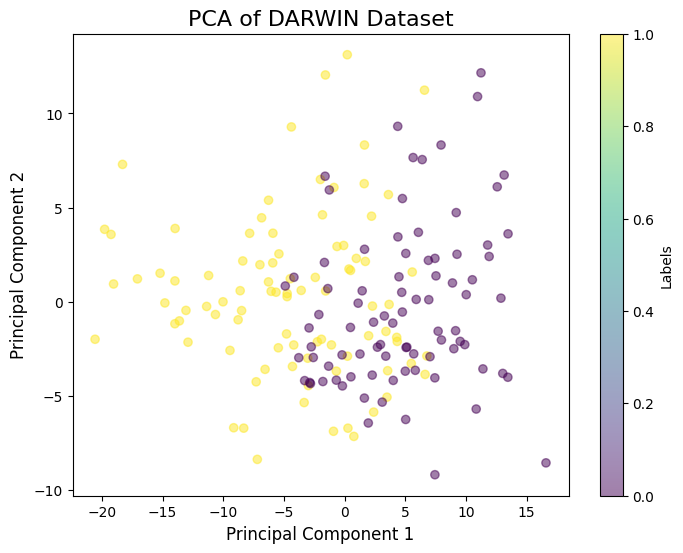

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot reduced data
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of DARWIN Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Labels')
plt.show()


__Answer [max 20 words]:__The separation between the clusters is not entirely clear as there is some overlap between the two classes.

**Task 1.2  [3 marks]**: Use Laplacian Eigenmaps to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5.

Compare the results of Laplacian Eigenmaps to PCA.

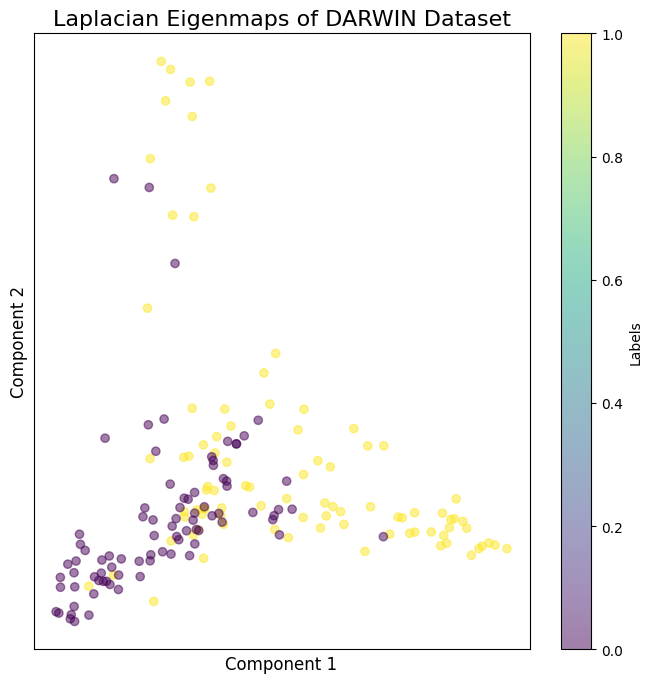

In [13]:
# Perform Lapplacian Eigenmaps
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

model = SpectralEmbedding(n_components=2, n_neighbors=10)

# Apply the model to the data to reduce to 2 dimensions
X_lle = model.fit_transform(X)

# Plot reduced data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])

scatter_plot = ax.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', alpha=0.5)

ax.set_title('Laplacian Eigenmaps of DARWIN Dataset', fontsize=16)
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)

plt.colorbar(scatter_plot, label='Labels')

# Show plot
plt.show()

__Answer [Max 40 words]:__ The Laplacian Eigenmaps method better separates the clusters providing more clear clusters, especially in dense areas, preserving local relationships. The PCA highlights overall variance but shows more overlap and struggles with non-linear separability in the dataset's structure.

### Random forest classification

**Task 1.3 [3 mark]:** Perform classification using Random Forest and calculate cross-validated accuracy. Extract and display the two most important features, including their names and importance values.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fit and evaluate a random forest classifier
clf = RandomForestClassifier(max_depth=5,n_estimators=50, random_state=0)
clf.fit(X, y)

# Perform 5-fold cross-validation
accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validated accuracy
print("Cross-validated accuracy: {:.2f}%".format(accuracy.mean() * 100))

Cross-validated accuracy: 80.87%


In [15]:
# Identify and print the two most important features
importances = clf.feature_importances_

# Get indices of the top 2 most important features
indices = np.argsort(importances)[::-1]

# Print feature names and importance values
print("Top 2 most important features:")
for i in range(2):  # Loop through the top 2 features
    print(f"{i + 1}. Feature: {df.columns.values[indices[i]]} (Importance: {importances[indices[i]]:.4f})")

Top 2 most important features:
1. Feature: total_time17 (Importance: 0.0408)
2. Feature: air_time15 (Importance: 0.0265)


**Task 1.4 [7 marks]:** Visualise the results of the random forest classification. Perform following steps:
* Perform PCA to reduce features to two dimensions
* Calculate the 2D feature range for the reduced features
* Predict the classification result for the 2D feature range and plot using `contourf`. *Hint: you will need to look up a method* `PCA.inverse_transform` *in sklearn help to predict the labels for the 2D feature range.*
* Plot the reduced data with the labels highlighted on the same plot.
* Based on the plot comment where the classifier is not performing well using key words "Sensitivity" and "Specificity". *Note: you are not required to calculate sensitivity and specificity, you are expected to infer this from the plot.*

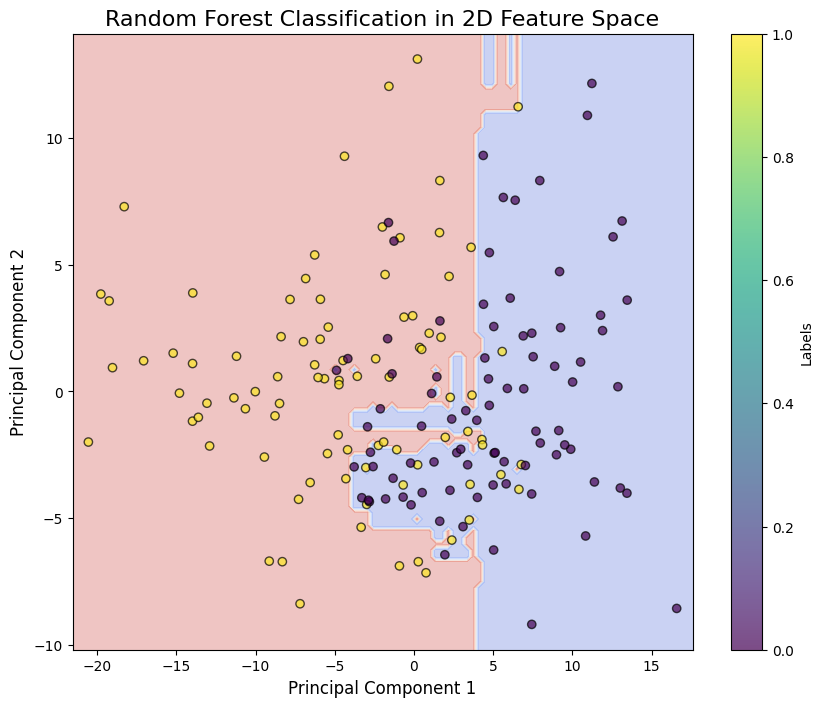

In [16]:
import numpy as np
from sklearn.decomposition import PCA

# Transform features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

clf.fit(X_pca,y)

# Define the 2D feature range
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Generate feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
X_mesh = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Predict and plot labels for the features space
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)
Z = clf.predict(pca.transform(grid_original))
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("Random Forest Classification in 2D Feature Space", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(label="Labels")
plt.show()


__Answer [max 50 words]__: The classifier struggles in regions where sensitivity is low, as it misses true positives (yellow points in purple zones). Similarly, specificity is poor in areas where purple zones overlap with yellow points, leading to false positives. Improving class separation and reducing overlaps could enhance both metrics.

### Feature selection

**Task 1.5 [8 marks]**: You are asked to develop a simple test for detection of Alzheimer's disease that could be used in clinical practice. The requirements are
* There should be as few measurements as possible
* The method for prediction of should be as simple as possible.
* Accuracy needs to be as high as possible.

Using feature selection methods that were covered in the lectures find the smallest number of features for predictions while preserving the accuracy as much as possible. Develop a test by training a linear classifier. Display the results of the classification, including the decision boundary, to visually assess the test. Print out the names of the selected features.

Decribe your new test and how you arrived at the solution. Explain why this new test is suitable. Keep your description brief.

*Hint: When reducing number of features don't look for highest performance, but rather smallest number of features for which performance does not drop significantly*

Selected feature indices: [107 269]
Accuracy with 2 features: 0.72


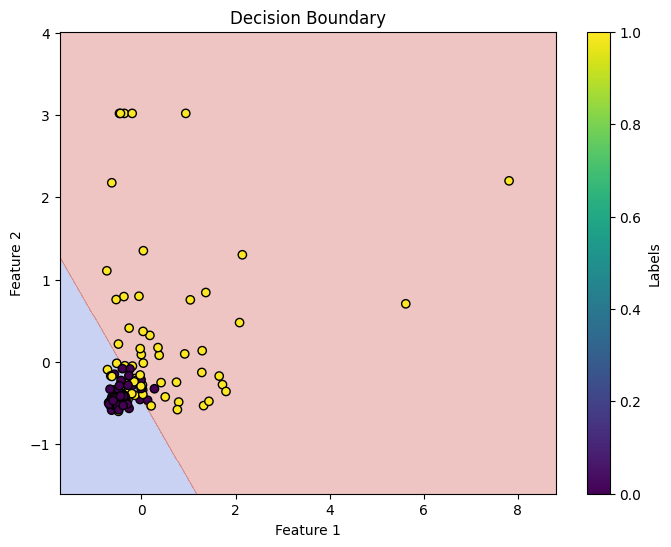

Selected features: ['total_time6', 'total_time15']


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)


selected_features = np.where(rfe.support_)[0]
print("Selected feature indices:", selected_features)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_rfe, y_train)

y_pred = clf.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with {len(selected_features)} features: {accuracy:.2f}")

if X_train_rfe.shape[1] == 2:
    x_min, x_max = X_train_rfe[:, 0].min() - 1, X_train_rfe[:, 0].max() + 1
    y_min, y_max = X_train_rfe[:, 1].min() - 1, X_train_rfe[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train_rfe[:, 0], X_train_rfe[:, 1], c=y_train, cmap='viridis', edgecolor='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Labels')
    plt.show()

print("Selected features:", [df.columns.values[i] for i in selected_features])


__Answer [max 40 words]:__ The test uses Recursive Feature Elimination (RFE) with a logistic regression classifier to select the smallest number of features (2) while maintaining high accuracy. This method balances simplicity and accuracy by eliminating unnecessary features, ensuring minimal measurement while preserving performance.



### Neural network classification
Design and train a neural network in Pytorch for classification of the Alzheimer's disease handwriting dataset.

**Task 1.6  [3 marks]**: Define an architecture of a neural network in Pytorch with these properties:
* 3 linear layers with 150, 50 and 1 output
* ReLU activation functions after the first two layers
* Sigmoid activation function after the final layer
* Binary Cross Entropy loss

In [18]:
import torch
import torch.nn as nn

# Define network architecture
class NNClassifier(nn.Module):
    def __init__(self):
        super(NNClassifier, self).__init__()

        # Define layers
        self.layer1 = nn.Linear(450, 150)  # First linear layer (450 input features, 150 units)
        self.layer2 = nn.Linear(150, 50)   # Second linear layer (150 input features, 50 units)
        self.layer3 = nn.Linear(50, 1)     # Third linear layer (50 input features, 1 output)

        # Define activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the network
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        return x

# Loss Function
loss_function = nn.BCELoss()

model = NNClassifier()

__Task 1.7 [3 marks]:__
Complete the code below to train and evaluate the network. The dataset has been split for you into training and test set.

Perform following:
* training for 100 epochs ensuring all steps are approrpiate
* evaluate accuracy on test set
* plot decision boundary as in Task 1.4

Epoch [10/100], Loss: 0.1092
Epoch [20/100], Loss: 0.0144
Epoch [30/100], Loss: 0.0060
Epoch [40/100], Loss: 0.0035
Epoch [50/100], Loss: 0.0024
Epoch [60/100], Loss: 0.0018
Epoch [70/100], Loss: 0.0014
Epoch [80/100], Loss: 0.0012
Epoch [90/100], Loss: 0.0010
Epoch [100/100], Loss: 0.0008
Test accuracy:  0.83


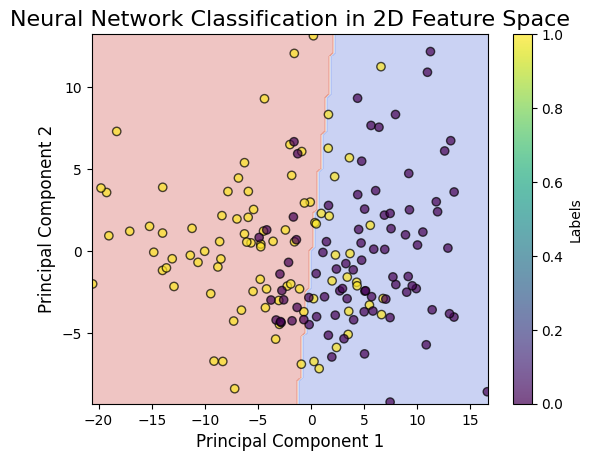

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Pytorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.reshape(-1,1)).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()

# Create the model
net = NNClassifier()

# Create the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

# Loss function
loss_fucntion = nn.BCELoss()  # Binary Cross Entropy Loss

# Training
epochs = 100
for epoch in range(epochs):
  net.train()
  # Zero the gradients before each step
  optimizer.zero_grad()

  # Forward pass
  outputs = net(X_train)

  # Calculate the loss
  loss = loss_function(outputs.squeeze(), y_train.squeeze())

  # Backpropagation
  loss.backward()

  # Update the weights
  optimizer.step()

  # Print the loss every 10 epochs
  if (epoch + 1) % 10 == 0:
      print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# accuracy on test set
net.eval()
with torch.no_grad():
    y_pred = net(X_test).squeeze()
    y_pred = (y_pred >= 0.5).float()

acc = accuracy_score(y_test, y_pred)
print('Test accuracy: ', np.round(acc, 2))

pca = PCA(n_components=2)
features_PCA = pca.fit_transform(X)

x_min, x_max = features_PCA[:, 0].min() - 0.1, features_PCA[:, 0].max() + 0.1
y_min, y_max = features_PCA[:, 1].min() - 0.1, features_PCA[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.stack([xx.flatten(), yy.flatten()]).T


Z = net(torch.from_numpy(pca.inverse_transform(grid)).float()).detach().numpy()
Z = (Z >= 0.5).astype(int)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot
plt.scatter(features_PCA[:, 0], features_PCA[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)

plt.title("Neural Network Classification in 2D Feature Space", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(label="Labels")
plt.show()


# Question 2

**[Total: 20 marks]**


## Brain segmentation

### Brain MRI
In babies, white matter (WM) goes through the process of myelination. Myelinated WM (mWM) is similar to adults, while unmyelinated WM is difficult to distinguish from grey matter (GM). In this question, your task is to segment myelinated WM from T1-weighted (T1w) and T2-weighted (T2w) MRI.

You are given two pickle files _'T1.p'_ and _'T2.p'_. These files contain the same coronal 2D slice of the baby brain MRI. You are asked to combine both images to perform the segmentation using __Gaussian Mixture Model__. You will produce only __one segmentation__ while using __both images__ at the same time __as features__.

The code below loads these T1w and T2w MRI slices. __Myelinated WM__ appears __bright in T1w__ image and __dark in T2w__ image.

In [ ]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload files 'T1.p' and 'T2.p'

# uncomment this
# from google.colab import files
# files.upload()

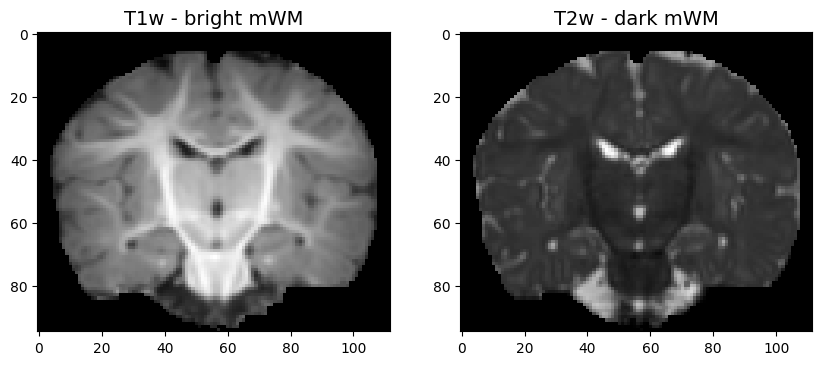

In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# load  images
f = open('T1.p', 'rb')
T1 = np.load(f)
f2 = open('T2.p', 'rb')
T2 = np.load(f2)

# display images
plt.figure(figsize = [10,4])
plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(T1)
plt.title('T1w - bright mWM', fontsize = 14)
plt.subplot(122)
plt.title('T2w - dark mWM', fontsize = 14)
plt.imshow(T2)

**Task 2.1 [3 marks]:** We start by plotting the joint distribution of the intesities of the images `T1` and `T2`. The brain is padded by zeros, so make sure you create joint distribution only from non-zero values. Both `T1` and `T2` images have been padded exactly the same way.

Perform following steps:
* Plot normalised 2D histogram (joint intensity distribution) of T1w and T2w MRI, excluding the padding (zeros). Select a suitable number of bins. *Hint: matplotlib package has a suitable function*
* Use `jet` colormap.
* Display the colorbar for your histogram.

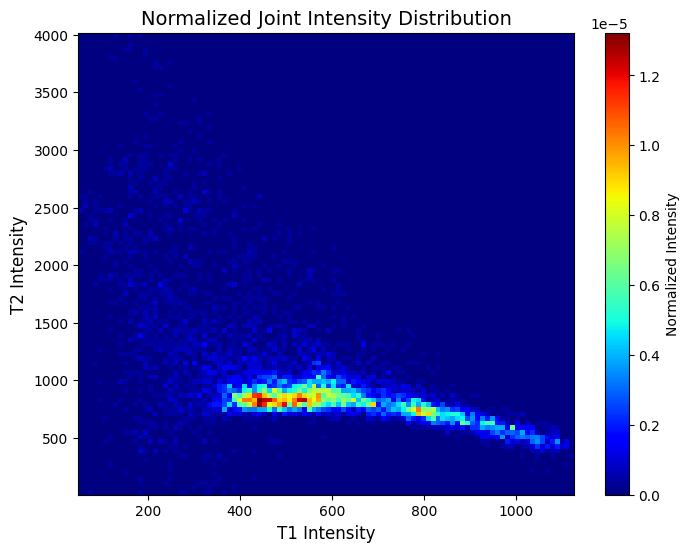

In [21]:
# Extract non-zero pixels
non_zero_indices = (T1 > 0) & (T2 > 0)
T1_non_zero = T1[non_zero_indices]
T2_non_zero = T2[non_zero_indices]

# Plot the normalized 2D histogram
plt.figure(figsize=(8, 6))
hist = plt.hist2d(
    T1_non_zero, T2_non_zero, bins=100, cmap='jet', density=True
)
plt.colorbar(label='Normalized Intensity')
plt.title('Normalized Joint Intensity Distribution', fontsize=14)
plt.xlabel('T1 Intensity', fontsize=12)
plt.ylabel('T2 Intensity', fontsize=12)
plt.show()

### GMM segmentation

**Task 2.2 [4 marks]:** Next you will perform GMM clustering using both images.

Answer the following questions:
* How many samples do we have? What do they represent? _Hint: use code below to find the answer._

    __Your answer:__ 7179 samples which represent the total amount of data stored in the slice images


* How many features do we have? What do they represent?

    __Your answer:__ 2 features which represent the 2 2D slice images of the baby brain MRI
    


Perform GMM clustering with 3 classes using 2D feature space composed of these two images. Display the segmentation. _Hint: Use_ `random_state` _to make sure you get the same result every time._

Number of samples: 7179
Number of features: 2


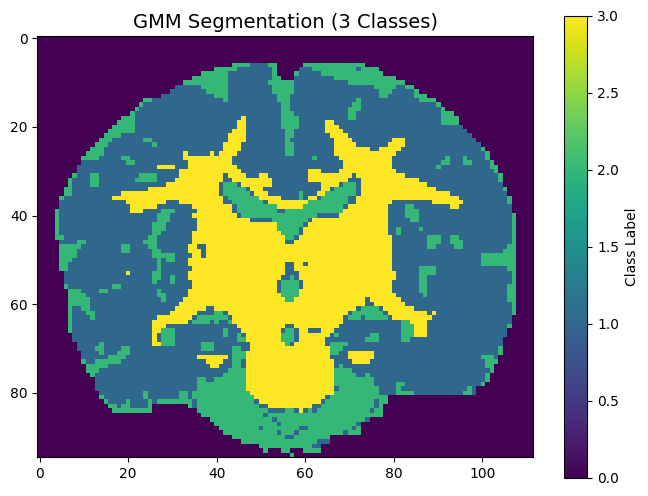

In [22]:
from sklearn.mixture import GaussianMixture

# Create 2D feature space (T1 and T2 intensities)
features = np.stack((T1_non_zero, T2_non_zero), axis=1)
print("Number of samples:", features.shape[0])
print("Number of features:", features.shape[1])

# Perform GMM clustering with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(features)

# Predict cluster labels for the data
labels = gmm.predict(features)

# Map the labels back to the original image shape
segmentation = np.zeros_like(T1, dtype=int)
segmentation[non_zero_indices] = labels + 1  # Label classes starting from 1

# Display the segmentation
plt.figure(figsize=(8, 6))
plt.imshow(segmentation, cmap='viridis')
plt.title('GMM Segmentation (3 Classes)', fontsize=14)
plt.colorbar(label='Class Label')
plt.show()

**Task 2.3 [3 marks]:** Predict and display posterior probability maps for all classes. Create a plot with three subplots and display one posterior probability map in each. Display a title with the name of the tissue represented by that propability map. Make sure that you correctly identify mWM.

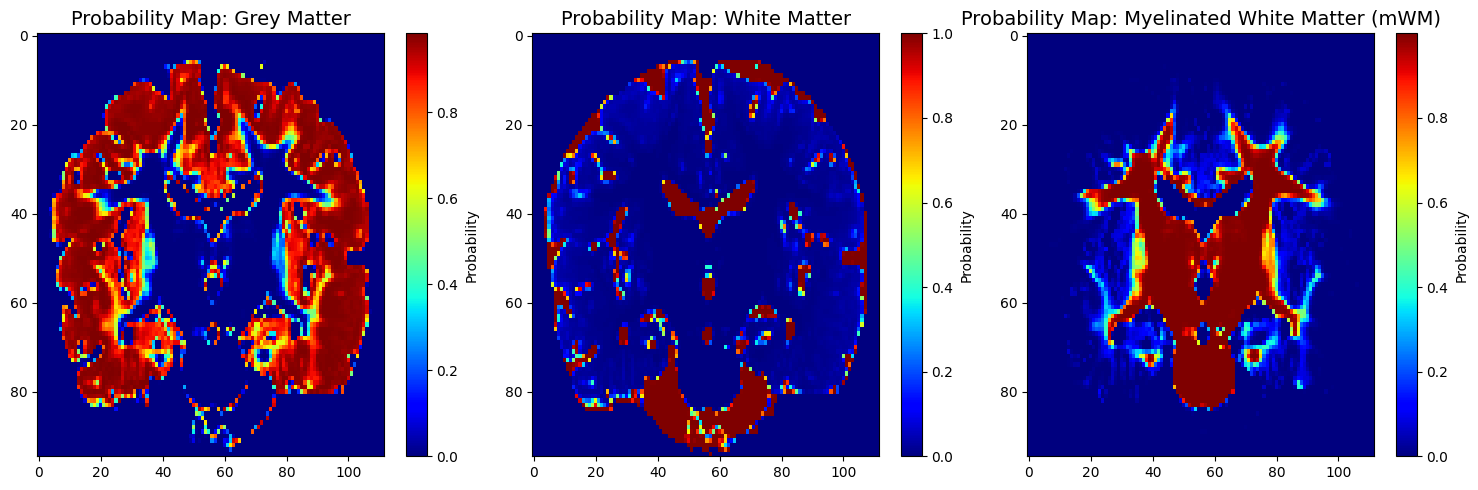

In [26]:
# Predict posterior probabilities
posterior_probs = gmm.predict_proba(features)

# Map posterior probabilities back to the original image shape
prob_maps = [np.zeros_like(T1, dtype=float) for _ in range(3)]
for i in range(3):
    prob_maps[i][non_zero_indices] = posterior_probs[:, i]

# Determine which class corresponds to mWM
# mWM is bright in T1 and dark in T2
mean_intensities = gmm.means_
mWM_class = np.argmax(mean_intensities[:, 0] - mean_intensities[:, 1])

tissue_names = ["Grey Matter", "White Matter", "Cerebrospinal Fluid"]
tissue_names[mWM_class] = "Myelinated White Matter (mWM)"

# Plot probability maps
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(prob_maps[i], cmap='jet', aspect='auto')
    plt.title(f"Probability Map: {tissue_names[i]}", fontsize=14)
    plt.colorbar(label='Probability')
plt.tight_layout()
plt.show()

__Task 2.4 [4 marks]:__ Answer following questions:
* What is the average T1w and T2w intensity of myelinated WM?

    __Your answer:__ Average T1w = 852.37, Average T2w = 680.26


* What percentage of brain tissue (excluding CSF) is myelinated WM?

    __Your answer:__ 27.11%
    
In the cell below write the code you need to answer these questions. Make sure the answers are printed out as well as answered above.

In [29]:
# Your supporing code here
# Calculate the average T1w and T2w intensities of myelinated WM

mWM_mask = np.zeros_like(T1, dtype=bool)
mWM_mask[non_zero_indices] = gmm.predict(features) == mWM_class

# Calculate average intensities for mWM
avg_T1_mWM = T1[mWM_mask].mean()
avg_T2_mWM = T2[mWM_mask].mean()

# Exclude CSF
csf_mask = np.zeros_like(T1, dtype=bool)
csf_mask[non_zero_indices] = np.sum(posterior_probs, axis=1) < 0.5

# Total brain tissue excluding CSF
brain_tissue_mask = non_zero_indices & ~csf_mask

# Percentage of mWM in brain tissue
percentage_mWM = (np.sum(mWM_mask) / np.sum(brain_tissue_mask)) * 100

# Print results
print("Average T1w intensity of myelinated WM: {:.2f}".format(avg_T1_mWM))
print("Average T2w intensity of myelinated WM: {:.2f}".format(avg_T2_mWM))
print("Percentage of brain tissue (excluding CSF) that is myelinated WM: {:.2f}%".format(percentage_mWM))

Average T1w intensity of myelinated WM: 852.37
Average T2w intensity of myelinated WM: 680.26
Percentage of brain tissue (excluding CSF) that is myelinated WM: 27.11%


### Likelihood and decision boundaries

**Task 2.5 [6 marks]**: Perform following tasks:
* Predict likelihood function $p(y|\phi)$ for the intensity ranges of the two images.
* Predict the cluster labels for the same intensity ranges.
* Display the joint distribution, likelihood and decision boundaries in a figure with three subplots, with `jet` colormap and colorbars.
* Compare the joint distribution, likelihood and decision boundaries. Comment on the quality of the fit. How accurate are the individual class distributions? Identify individual clusters with the colors on your decision boudnary plot.

*Note: This is an advanced question expected only from students aiming at top marks, if too difficult move to the next question*

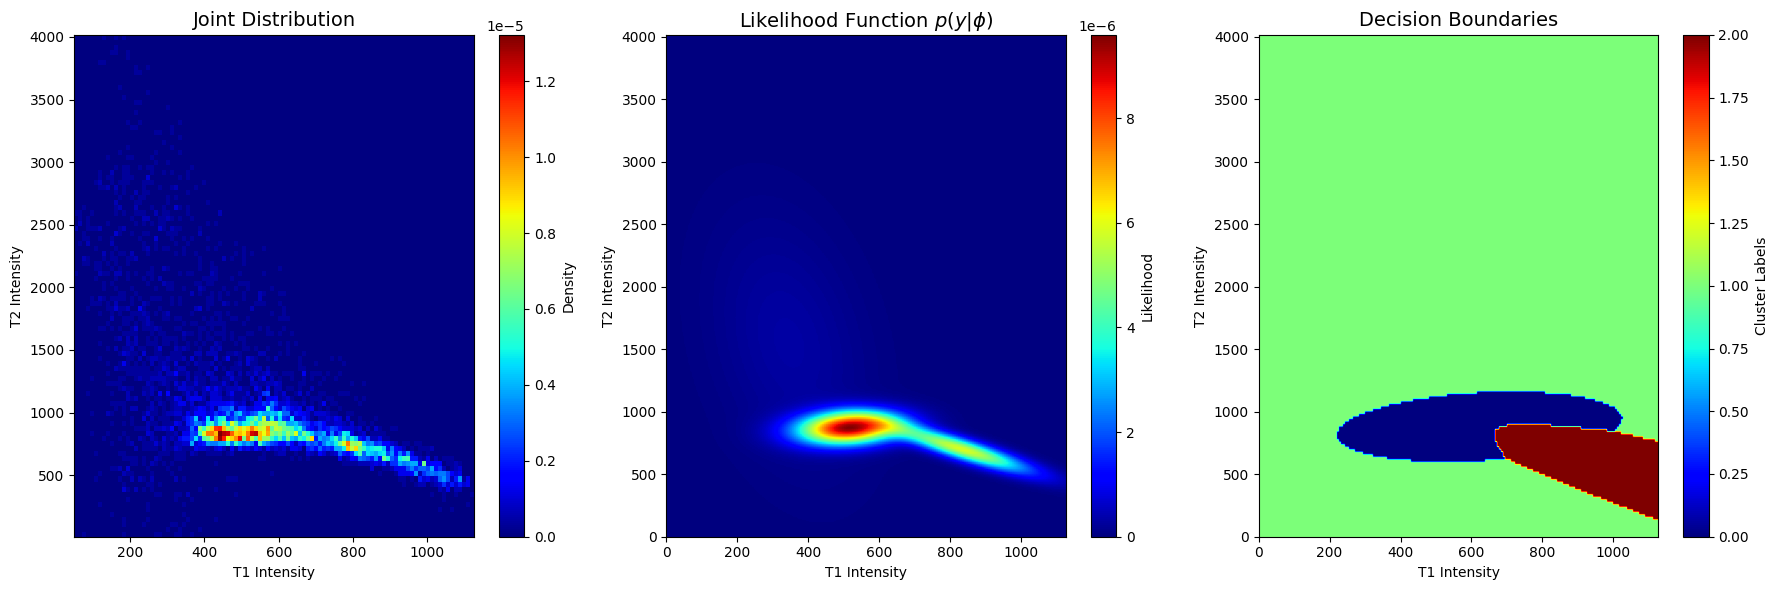

In [30]:
# Intensity range for T1 and T2 images
T1_range = np.linspace(T1.min(), T1.max(), 200)
T2_range = np.linspace(T2.min(), T2.max(), 200)

# Grid of intensity values
T1_grid, T2_grid = np.meshgrid(T1_range, T2_range)
grid_features = np.column_stack((T1_grid.ravel(), T2_grid.ravel()))

likelihoods = np.exp(gmm.score_samples(grid_features)).reshape(T1_grid.shape)  # Likelihood function
labels = gmm.predict(grid_features).reshape(T1_grid.shape)  # Cluster labels

# Plot results
plt.figure(figsize=(18, 6))

#Joint distribution (2D histogram)
plt.subplot(1, 3, 1)
plt.hist2d(T1_non_zero, T2_non_zero, bins=100, cmap='jet', density=True)
plt.colorbar(label="Density")
plt.title("Joint Distribution", fontsize=14)
plt.xlabel("T1 Intensity")
plt.ylabel("T2 Intensity")

#Likelihood function
plt.subplot(1, 3, 2)
plt.imshow(likelihoods, extent=[T1.min(), T1.max(), T2.min(), T2.max()],
           origin='lower', cmap='jet', aspect='auto')
plt.colorbar(label="Likelihood")
plt.title("Likelihood Function $p(y|\\phi)$", fontsize=14)
plt.xlabel("T1 Intensity")
plt.ylabel("T2 Intensity")

#Decision boundaries
plt.subplot(1, 3, 3)
plt.imshow(labels, extent=[T1.min(), T1.max(), T2.min(), T2.max()],
           origin='lower', cmap='jet', aspect='auto')
plt.colorbar(label="Cluster Labels")
plt.title("Decision Boundaries", fontsize=14)
plt.xlabel("T1 Intensity")
plt.ylabel("T2 Intensity")

plt.tight_layout()
plt.show()

__Your answer:__ The joint distribution highlights overlapping intensities for T1 and T2, indicating challenges in separating classes. The likelihood map shows concentrated regions but some overlap persists. Decision boundaries effectively partition clusters (blue, green, red) but suggest minor misclassification due to overlap. Individual class distributions fit moderately well but could improve.

# Question 3

**[Total: 20 marks]**

## Ensembles

In this question we will experiment with ensembles for classification. We will use the heart failure dataset you know from the tutorials. The code below
* loads and pre-processes the heart failure dataset
* provides functions for plotting the results and evaluation.

Run the code. Please have a careful look through the code to understand what it does because you will need to use it.

In [ ]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload files "heart_failure_data_complete.csv"

# uncomment this
# from google.colab import files
# files.upload()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import recall_score

# Load csv file
df = pd.read_csv("heart_failure_data_complete.csv")
data = df.to_numpy()

# Print number of samples
print('Number of samples: ',data.shape[0])

# Create and standardise the feature matrix, create label vector
X = StandardScaler().fit_transform(data[:,[1,2]])
y = data[:,0]
print('Features dims: {}  Labels dims: {}'.format(X.shape, y.shape))


def plotData(X,y):
    plt.plot(X[y==0,0],X[y==0,1],'bo', label = 'Healthy')
    plt.plot(X[y==1,0],X[y==1,1],'rd', label = 'Mild HF')
    plt.plot(X[y==2,0],X[y==2,1],'g^', label = 'Severe HF')
    plt.legend()
    plt.title('Heart failure data')
    plt.xlabel('EF')
    plt.ylabel('GLS')

def plotDecisionBoundary(model,X,y):
    # Create an array that represents the sampled feature space
    xx = np.linspace(-3, 3, 500)
    yy = np.linspace(-3, 3.5, 500).T
    xx, yy = np.meshgrid(xx, yy)
    Feature_space = np.c_[xx.ravel(), yy.ravel()]

    # predict labels
    y_pred = model.predict(Feature_space).reshape(xx.shape)

    # plot predictions
    plt.contourf(xx,yy,y_pred, cmap = 'summer')
    plotData(X,y)

def evaluate(model,X,y):
    print('Accuracy: ', np.round(model.score(X,y),2))
    print('CV accuracy: ', np.round(cross_val_score(model,X,y).mean(),2))
    y_pred_cv = cross_val_predict(model,X,y)
    print('CV recalls: ',np.round(recall_score(y, y_pred_cv, average=None),2))
    plotDecisionBoundary(model, X,y)

Number of samples:  120
Features dims: (120, 2)  Labels dims: (120,)


### Bagging

**Task 3.1 [3 marks]:** The code in the following cell fits a decision tree classifier to the data and evaluates the resulting model. Run the code. Analyse the performance of the classifier.

Accuracy:  1.0
CV accuracy:  0.79
CV recalls:  [0.92 0.69 0.58]


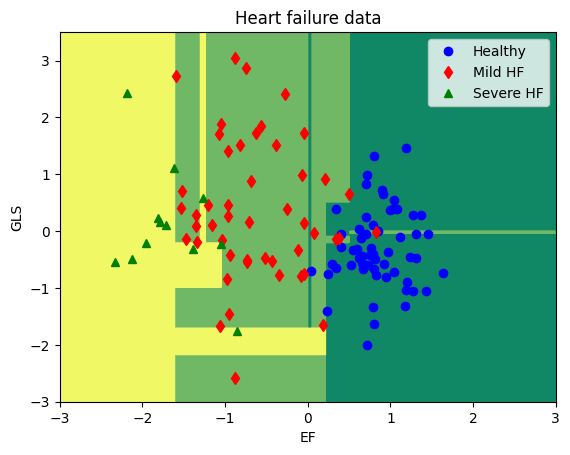

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)
evaluate(clf,X,y)

__Your answer [max 40 words]:__ The classifier achieves perfect training accuracy but lower cross-validation accuracy (0.79), indicating overfitting. Recall drops significantly for "Mild HF" (0.69) and "Severe HF" (0.58), suggesting poor generalization for these classes. Decision boundaries lack clarity in overlapping regions.


__Task 3.2 [3 marks]:__ Implement bagging using scikit-learn classifier `BaggingClassifier`. To do that follow these instructions:
* use the decision tree classifier implemented in Task 3.1 as the base estimator
* train 20 estimators
* use bootstrapping with half the samples to train each individual estimator
* fit the classifier on the whole dataset and evaluate it using function `evaluate`

Accuracy:  0.93
CV accuracy:  0.88
CV recalls:  [0.92 0.92 0.5 ]


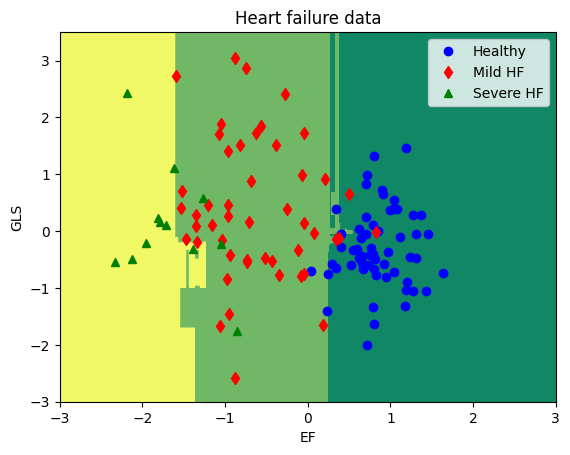

In [34]:
from sklearn.ensemble import BaggingClassifier

# Decision tree classifier
base_clf = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=20,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

# Fit the BaggingClassifier to the data
bagging_clf.fit(X, y)

# Evaluate the BaggingClassifier
evaluate(bagging_clf, X, y)

**Task 3.3 [4 marks]:** Compare the performance of the bagging clasifier in Task 3.2 with the decision tree in Task 3.1. Answer the following questions:
* How does the performence differ?

    __Your answer [max 30 words]:__ The bagging classifier has better cross-validated accuracy (0.88 vs. 0.81) and recall for the mild HF class (0.92 vs. 0.69), though recall for severe HF remains low.


* Explain why this difference in performance occured?

    __Your answer [max 30 words]:__ Bagging reduces overfitting by combining predictions from multiple models trained on different data subsets, leading to better generalization, particularly for mild HF.


__Task 3.4 [4 marks]:__ The code below fits and evaluates Logistic Regression Classifier. Run the code. Compare the performance of this classifier to the Decision Tree in Task 3.1. Explain why this difference occured.

Accuracy:  0.89
CV accuracy:  0.88
CV recalls:  [0.97 0.85 0.58]


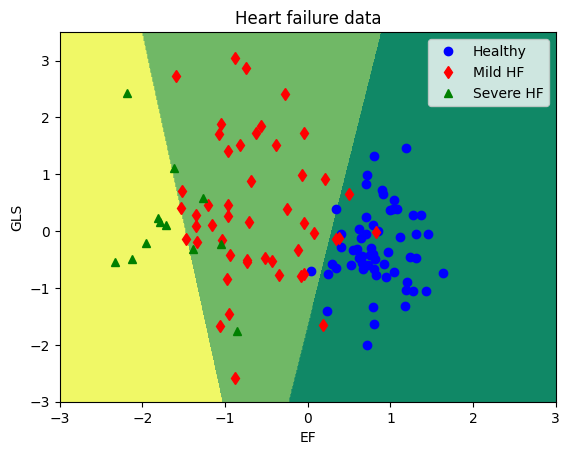

In [35]:
from sklearn.linear_model import LogisticRegression
clf2=LogisticRegression(C=10)
clf2.fit(X,y)
evaluate(clf2,X,y)

__Your answer [max 50 words]:__ The logistic regression classifier (accuracy: 0.89, CV accuracy: 0.88) shows slightly lower performance than the decision tree (accuracy: 1.0, CV accuracy: 0.81). This is because logistic regression, being a simpler model, has a linear decision boundary that can't capture the complexity of the data as well as a decision tree.



### Boosting

__Task 3.5 [2 marks]:__ Implement Boosting using scikit-learn `AdaBoostClassifier`. To do that perform the following:
* use the Logistic Regression classifier created in Task 3.4 as your base estimator
* fit the AdaBoost classifier on the whole datates and evalute

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.82


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

CV accuracy:  0.81


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

CV recalls:  [0.98 0.6  0.75]


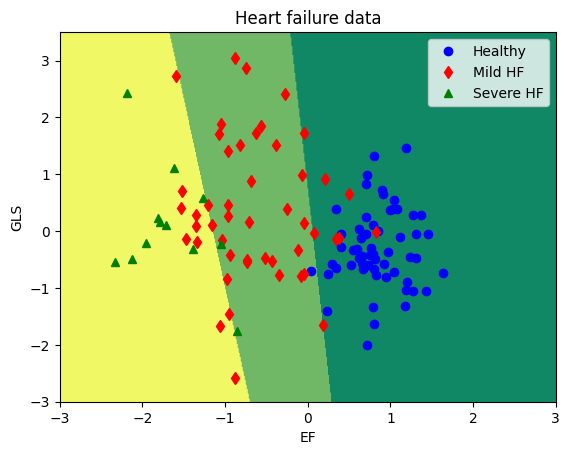

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the base estimator (Logistic Regression)
base_estimator = LogisticRegression(C=10)

# Initialize the AdaBoost classifier with Logistic Regression as base estimator
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier
ada_boost.fit(X, y)

# Evaluate the AdaBoost classifier using the evaluate function
evaluate(ada_boost, X, y)


__Task 3.6 [4 marks]:__ Compare the performance of the AdaBoost classifier in Task 3.5 to the original Logistic Regression classifier in Task 3.4. What has changed and why?

__Your answer [max 70 words]:__ The AdaBoost classifier shows lower accuracy (0.82) compared to the Logistic Regression classifier (0.89). While AdaBoost improved recall for the first class (0.98), it significantly reduced recall for the second class (0.6). This is likely due to AdaBoost focusing more on harder-to-classify instances, which can lead to better performance for certain classes but worse overall results.


# Question 4

**[Total: 30 marks]**

## Detecting cancer from histopatological images

In this question we will implement a __CNN to classify histopatological images for presence of cancer__. More details about the PatchCamelyon dataset can be found here https://github.com/basveeling/pcam.
<img src="pcam.jpg" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

For this question we recommend you use **google colab**. Watch the 'Instructions for Colab' video on KEATS if you have not done so, and make sure to **change colab runtime to GPU** else it will take too long to train.

To upload the data to colab, complete the following steps:

1. First mount your drive by running the below cell and following the 'sign in' steps.

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


2.  Upload the data set `'histological_data.npz'` to your Google drive. Edit the path below to define where you have put the data relative to the top level of your drive. Then run the cell to load the dataset.

In [2]:
# edit this path to match where you put your data
path='datasets/histological_data.npz'

full_path=os.path.join('/content/drive/My Drive/', path)

# Load dataset from .npz file
import numpy as np
data = np.load(full_path)

In [ ]:
# in case you want to check the data locally
import numpy as np
data = np.load('histological_data.npz')

FileNotFoundError: [Errno 2] No such file or directory: '/histological_data.npz'

3. Now Run the code below to check the import has worked and print out the train and test dataset dimensions. You should find the training data has shape (1500,96,96) and the test has shape (150,96,96). This means that your images are 2D with dimensions 96 x 96

In [3]:
# Train images and labels
X_train = data['X_train']
y_train = data['y_train'].astype('int')

# Test images and labels
X_test  = data['X_test']
y_test  = data['y_test'].astype('int')

# Print shapes here
print('Training data - images:', X_train.shape)
print('Training data - labels:',y_train.shape)
print('Test data - images:',X_test.shape)
print('Test data - labels:',y_test.shape)

Training data - images: (1500, 96, 96)
Training data - labels: (1500,)
Test data - images: (150, 96, 96)
Test data - labels: (150,)


Let's now plot a few example images. Note that label 1 means presence of cancerous cells.

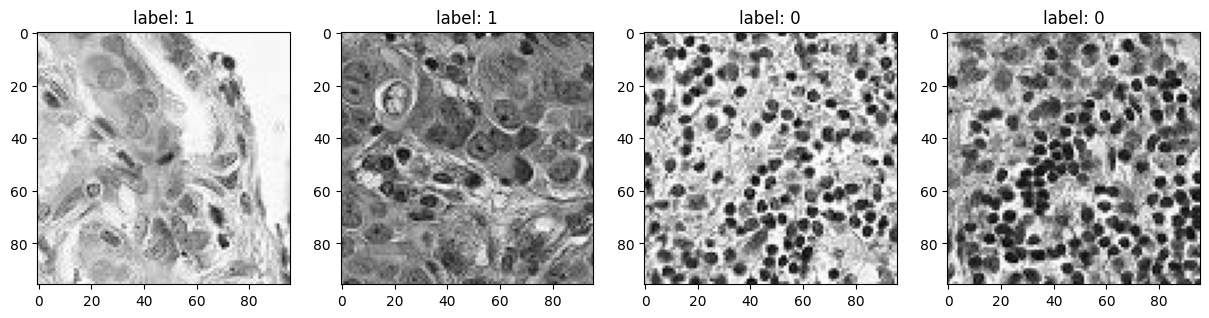

In [4]:
import matplotlib.pyplot as plt

id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

Finally we need to reshape the data to fit the dimensions expected by pytorch and convert to torch tensors

In [5]:
import torch

X_train_torch=torch.from_numpy(np.expand_dims(X_train,axis=1)).to(torch.float)
X_test_torch=torch.from_numpy(np.expand_dims(X_test,axis=1)).to(torch.float)

y_train_torch=torch.from_numpy(y_train).to(torch.long)
y_test_torch=torch.from_numpy(y_test).to(torch.long)

print('Training data - newshape:', X_train_torch.shape)
print('Training data - labels:',y_train_torch.shape)
print('Test data - newshape:',X_test_torch.shape)
print('Test data - labels:',y_test_torch.shape)

Training data - newshape: torch.Size([1500, 1, 96, 96])
Training data - labels: torch.Size([1500])
Test data - newshape: torch.Size([150, 1, 96, 96])
Test data - labels: torch.Size([150])


### Build CNN for classification

Using what you have learnt in the lectures and tutorial, create a CNN network class that performs classification. The class structure has been created for you.

**Task 4.1 [9 marks]:** Define the convolutional and linear layers for your network by completing those lines in the class constructor

4.1.1. create the convolutional layers
 - layer 1 should learn 16 filters kernel size 5
 - layer 2 should learn 32 filters kernel size 5


4.1.2. implement 2 fully connected linear layers
 - layer 1 should learn 100 neurons
 - layer 2 (the classification layer) should learn 2 outputs

4.1.3. implement the forward function
  - implement first convolutional layer with relu activation
  - implenment second convolutional layer with relu activation
  - flatten output prior to linear layer
  - implement linear layer one with relu activation
  - implement linear layer two
  
 *Note: We have learned that binary classification can have one output and uses BCE loss, but two outputs with CE loss is a valid alternative*

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# will allow network to run on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 4.1.1 create a convolutional layer with kernel size 5 that learns 16 filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)

        # maxpool implemented for you
        self.pool = nn.MaxPool2d(2, 2)

        # 4.1.1 create a convolutional layer with kernel size 5 that learns 32 filters
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        # 4.1.2 create a linear layer that takes the flattened output from conv2 and learns 100 neuros
        # The dimension of the flattened output is determined by the convolution and pooling operations.
        # Calculation:
        # Input image: 96x96
        # After conv1 (kernel 5, no padding): 96 - 5 + 1 = 92 -> 92x92
        # After pool1: 92 / 2 = 46 -> 46x46
        # After conv2 (kernel 5, no padding): 46 - 5 + 1 = 42 -> 42x42
        # After pool2: 42 / 2 = 21 -> 21x21
        # Flattened size: 32 * 21 * 21
        flattened_size = 32 * 21 * 21
        self.fc1 = nn.Linear(flattened_size, 100) #hint: you need to work out the dimension of the flattened output of conv2 ( i.e. you can print it)

        # 4.1.2 create a linear layer that takes the output from fc2 and learns 2 output neurons
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        # 4.1.3 implement forward pass
        # Apply the first convolutional layer with ReLU
        x = self.pool(F.relu(self.conv1(x)))

        # Apply the second convolutional layer with ReLU
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the output
        x = torch.flatten(x, start_dim=1)

        # Apply the first fully connected layer with ReLU
        x = F.relu(self.fc1(x))

        # Apply the second fully connected layer
        x = self.fc2(x)

        return x



net = Net().to(device)

**Task 4.2 [4 mark]:** Give the dimensions of the learnable parameters for
*  the first convolutional layer `conv1`

  __Your answer:__ 416 parameters (400 (16 x 25) (weights) + 16 (biases))

* the second convolutional layer `conv2`

  __Your answer:__ 12832 parameters (12800 (32x16x5x5) (weights) + 32 (biases))

**Task 4.3 [6 mark]:** Calculate by hand the number of learnable weights in each individual layer and the total number of learnable weights trained in this network. Show how you worked it out.

__Your answer:__
conv1 = 416 ((16x5x5) + 16),
conv2 = 12832 ((32x16x5x5) + 32),
fc1 = 1411300 ((32x21x21) + (100x14112)),
fc2 = 202 ((2x100) + 2),
total = 416+12832+1411300+202= 1424750

**Task 4.4 [1 mark]:** Define a cross-entropy loss function. Optimiser with a suitable learning rate has been set up for you.

In [7]:
# loss
loss_fun = nn.CrossEntropyLoss()
loss_fun = loss_fun.to(device)

# optimiser
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

**Task 4.5 [10 marks]:** Train your network on the training set and validate it on the test set. To do that

- 4.3.1: Complete the training loop
- 4.3.2: Complete the code to calculate validation loss and accuracy on the test set
- 4.3.3: Plot the model performance over epochs **for test set only**


*__Hint 1:__ Watch for improvement in the training loss to see that the network is training correctly. It may take time for training/validation accuracy to start improving, so be patient. Make sure you use GPU runtime on Colab, otherwise it will be too slow to see improvement.*

*__Hint 2:__ You can see the training loss oscilating towards the end of the  training. This is not to worry about - it shows that the learning rate is still a bit too high. We keep it that way so be able to start seeing improvement at the beginning of the training.*

*__Note:__ We only use training and validation in this exercise for simplicity. Use __training set__ for training and __test set__ for validation.*

Epoch [1/500], Train Loss: 0.7103, Val Loss: 0.7073, Val Accuracy: 0.3267
Epoch [11/500], Train Loss: 0.6720, Val Loss: 0.6203, Val Accuracy: 0.6733
Epoch [21/500], Train Loss: 0.6644, Val Loss: 0.6418, Val Accuracy: 0.6733
Epoch [31/500], Train Loss: 0.6594, Val Loss: 0.6237, Val Accuracy: 0.6733
Epoch [41/500], Train Loss: 0.6547, Val Loss: 0.6303, Val Accuracy: 0.6733
Epoch [51/500], Train Loss: 0.6499, Val Loss: 0.6259, Val Accuracy: 0.6600
Epoch [61/500], Train Loss: 0.6443, Val Loss: 0.6224, Val Accuracy: 0.6333
Epoch [71/500], Train Loss: 0.6368, Val Loss: 0.6189, Val Accuracy: 0.6533
Epoch [81/500], Train Loss: 0.6278, Val Loss: 0.6108, Val Accuracy: 0.6733
Epoch [91/500], Train Loss: 0.6172, Val Loss: 0.5998, Val Accuracy: 0.7067
Epoch [101/500], Train Loss: 0.6037, Val Loss: 0.5859, Val Accuracy: 0.7533
Epoch [111/500], Train Loss: 0.5860, Val Loss: 0.5656, Val Accuracy: 0.7800
Epoch [121/500], Train Loss: 0.5648, Val Loss: 0.5406, Val Accuracy: 0.7867
Epoch [131/500], Train 

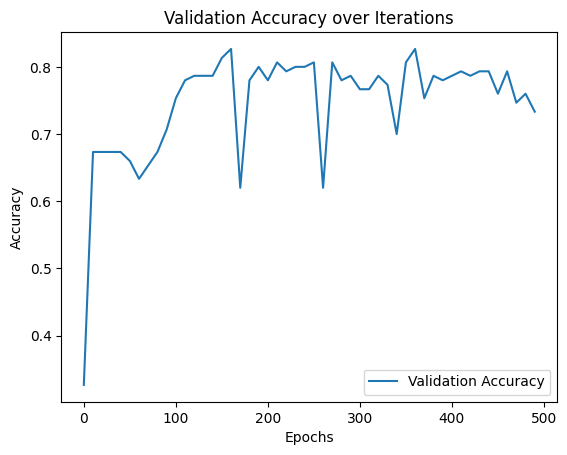

In [8]:
from sklearn.metrics import accuracy_score

epochs = 500
accuracy=[]
best_val_acc = 0.0

for epoch in range(epochs):

    net.train()
    # send your training data to GPU device
    data = X_train_torch.to(device)
    label = y_train_torch.to(device)

    # 4.3.1: Complete the training loop
    optimizer.zero_grad()
    outputs = net(data)

    err = loss_fun(outputs, label)
    err.backward()

    optimizer.step()

    # validation: evaluate on test set every 10 iterations
    if epoch % 10==0:
        net.eval()

        # 4.3.2: Calculate validation loss and accuracy (use test set)

        data_val = X_test_torch.to(device)
        label_val = y_test_torch.to(device)

        # predict validation outputs
        with torch.no_grad():
            outputs_val = net(data_val)

        # calculate validation error
        val_err = loss_fun(outputs_val, label_val)

        # calculate accuracy
        _, predicted = torch.max(outputs_val, 1)
        acc = accuracy_score(label_val.cpu(), predicted.cpu())

        # Append the validation accuracy to the list
        accuracy.append(acc)

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.4f}'.format(
            epoch + 1, epochs, err.item(), val_err.item(), accuracy[-1]))

        if acc > best_val_acc:
            best_val_acc = acc
# end of the training loop

# Print the highest validation accuracy that we achieved during training
print('Best Validation Accuracy: {:.4f}'.format(best_val_acc))

# 4.3.3: Plot the validation accuracy over iterations

plt.plot(range(0, epochs, 10), accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Total for CW3: 100 marks

__IMPORTANT: Download your solved notebook from Colab and upload it on KEATS. Make sure that the output of the cells is visible after downloading, otherwise we will not be able to mark your work. Make sure your code is working, if not we will deduct marks.__